In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

# <b><font size="7" color="red">ch11. 데이터프레임과 시리즈</font></b>
- pip install pandas
# 1장 판다스 패키지
- 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이를 기반으로 하며,
  다른 많은 라이브러리와 잘 통합되도록 설계
- 2차원 구조를 갖는 데이터프레임, 1차원 구조를 갖는 시리즈를 제공
- 판다스 장점 : 데이터프레임생성, 파일io, 레이블링, 부분데이터 추출,
  크기변경(행이나 열 삽입, 삭제), 데이터 분할, 병합, 데이터구조변경, 결측치 처리
  
- https://pypi.python.org/pypi/pandas(package index)
- http://pandas.pydata.org/pandas-docs/stable/api.html(API reference)

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [4]:
data = pd.read_json('data/ch09_member1.json', encoding='cp949')
display(data)

,name,age,email,address
0,신길동,30,s@s.com,서울
1,김길동,20,a@s.com,수원
2,홍길동,10,d@s.com,부산


In [5]:
member4 = pd.read_csv('data/ch09_member4.csv')
display(member4)

,name,age,email,address
0,신길동,30,s@s.com,서울
1,김길동,20,a@s.com,수원
2,홍길동,10,d@s.com,부산


In [7]:
member1 = pd.read_csv('data/ch09_member1.csv', header=None, names=['name','age','email','address]'])
member1

,name,age,email,address]
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


# 2장 데이터프레임 만들기
## 2.1 딕셔너리 리스트를 이용해서 데이터 프레임 만들기

In [8]:
d = [{'kor':100,'mat':97},{'kor':90, 'mat':30}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,97
1,90,30


In [9]:
df.to_dict() # 데이터프레임을 딕셔너리로

{'kor': {0: 100, 1: 90}, 'mat': {0: 97, 1: 30}}

In [10]:
df.to_numpy() # 데이터프레임을 넘파이배열
df.valus # 위와 동일

array([[100,  97],
       [ 90,  30]], dtype=int64)

In [11]:
df.dtypes # 열의 타입

kor    int64
mat    int64
dtype: object

In [12]:
df.info() # ★

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [13]:
# 타입변경(열마다)
import numpy as np
df['kor'].astype(np.float64)
df['kor'] = df['kor'].astype('float64') # kor열의 타입을 float64로

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   mat     2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [15]:
d = [{'kor':100,'mat':97},{'kor':90, 'mat':30},{'kor':92, 'eng':70}]
df = pd.DataFrame(data=d)
df

,kor,mat,eng
0,100,97.0,NaN
1,90,30.0,NaN
2,92,NaN,70.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
 2   eng     1 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 200.0 bytes


In [17]:
type(np.nan) # np.nan 결측치

float

In [18]:
df['kor'] = df['kor'].astype('int32')
df

,kor,mat,eng
0,100,97.0,NaN
1,90,30.0,NaN
2,92,NaN,70.0


In [ ]:
# 결측치는 int로 형변환 불가(결측치를 대체값으로 치환 후 변환)
# df['mat'] = df['mat'].astype('int32')

## 2.2 리스트를 이용해서 데이터프레임 만들기

In [19]:
kor = [100,90,95,90,56]
mat = [99,100,40,89,79]
df = pd.DataFrame({'kor':kor, 'mat':mat})
df.head(2) # 상위 2행만

,kor,mat
0,100,99
1,90,100


In [20]:
np.c_[kor, mat]

array([[100,  99],
       [ 90, 100],
       [ 95,  40],
       [ 90,  89],
       [ 56,  79]])

In [23]:
df = pd.DataFrame(data=np.c_[kor, mat], columns=['국어','수학'])
df

,국어,수학
0,100,99
1,90,100
2,95,40
3,90,89
4,56,79


In [24]:
l = [['트렌드 코리아2026', '김난도', 10000, 10],
     ['사탄탱고', '라슬로', 17820, 10],
     ['미술관 여행자', '카미유주노', 29700, 10]]
df = pd.DataFrame(l, columns=['책이름', '저자', '가격', '할인율'])
df

,책이름,저자,가격,할인율
0,트렌드 코리아2026,김난도,10000,10
1,사탄탱고,라슬로,17820,10
2,미술관 여행자,카미유주노,29700,10


In [26]:
%ls "c:/taro/ai/downlload/shareData/상가정보"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A014-DCD6

 c:\taro\ai\downlload\shareData\상가정보 디렉터리

2025-10-12  오후 03:33    <DIR>          .
2025-10-12  오후 03:33    <DIR>          ..
2025-04-27  오후 11:07             1,011 [필독]파일열람방법.txt
2025-04-27  오후 11:07        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-27  오후 11:07       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-27  오후 11:07        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-27  오후 11:07        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-27  오후 11:07        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-27  오후 11:07        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-27  오후 11:07        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-27  오후 11:07        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-27  오후 11:07       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-27  오후 11:07         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-27  오후 11:07        28,457,489 소상공인시

In [27]:
df = pd.read_csv('c:/taro/ai/downlload/shareData/상가정보/소상공인시장진흥공단_상가(상권)정보_서울_202503.csv',
                nrows=70) # 처음 70형만 가져오기
df.shape

(70, 39)

In [28]:
# 판다스 디스플레이 읍션
pd.options.display.max_columns = 39 # 39열까지 디스플레이 가능. 기본값은 20
pd.options.display.max_rows = 70 # 70행까지 디스플레이 가능. 기본값은 60

In [30]:
df.head(1).T

,0
상가업소번호,MA010120220800000033
상호명,부동산임대김은숙
지점명,NaN
상권업종대분류코드,I2
상권업종대분류명,음식
상권업종중분류코드,I212
상권업종중분류명,비알코올
상권업종소분류코드,I21201
상권업종소분류명,카페
표준산업분류코드,I56229


## 2.3 read_csv

In [31]:
# pd.read_csv() #함수 안에서 shift+tab+tab
pd.read_csv?

In [34]:
# (1) CSV 파일 불러오기(기본값)
member = pd.read_csv('data/ch11_member.csv')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [37]:
# 문자형으로 읽어들인 Birth를 datetime형으로
# 형변환 : astype('int64'), astype('datetime64')
#            to_datetime() 함수
# member['Birth'].astype('datetime64')
member['Birth'] = pd.to_datetime(member['Birth'])
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [38]:
member['Age'] = member['Age'].astype(np.int16)
member.dtypes

Name               object
Age                 int16
Email              object
Address            object
Birth      datetime64[ns]
dtype: object

In [41]:
# (2) 특정행을 제외하고 csv 파일 읽어오기
member = pd.read_csv('data/ch11_membercp949.csv', encoding='cp949',
                    skiprows=[1,6]) # 1,6번째 행 제외하고 읽어오기(시작은 1부터)
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [43]:
# (3) 상위몇행만 sep문자는 , 아닌 csv파일 읽어오기
member = pd.read_csv('data/ch11_membersep.csv', 
                     nrows=5, # 상위 5행만
                     sep='|')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [44]:
# (4) 주석(#)제외, datetime형 필드를 지정하여 csv 파일 읽어오기
member = pd.read_csv('data/ch11_membertab.csv', sep='\t',
                     comment='#', # 주석제외
                    parse_dates=['Birth']) # datetime64형으로 읽어올 필드 지정
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 2.4 패키지에서 가져오기 : irus 데이터
- iris 가져오기 방법1 : sklearn(머신러닝 패키지)
- iris 가져오기 방법2 : statsmodels(R 데이터)
- iris 가져오기 방법3 : seaborn(시각화패키지)
### 2.4.1 iris 방법 1 : sklearn
- sklearn.darasets 모듈 데이터(iris)를 데이터 프레임으로 변환

In [47]:
from sklearn import datasets # 머신러닝을 공부하기 위한 학습 데이터셋 제공
# sklearn 패키지에서 제공되는 데이터셋은 딕셔너리 형식으로 제공
iris = datasets.load_iris()
iris # Bunch타입(딕셔너리를 상속받은 타입) 딕셔너리처럼 동작
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [48]:
iris.data # 독립변수
iris['data'][:3] # 상위 3행

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [49]:
# 데이터프레임의 열이름(비추)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
# 데이터프레임의 열이름(강추)
[col[:-5].replace(' ','_') for col in iris.feature_names]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [52]:
iris.target # ML/DL 학습시 타겟변수(종속변수)
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
iris.target_names[iris.target] # 데이터프레임에 쓸 타겟변수(가장 오른쪽 열)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [55]:
# 독립변수
data = iris.data
# 종속변수
target = iris.target_names[iris.target].reshape(-1,1)
print(data[:3], target[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [['setosa']
 ['setosa']
 ['setosa']]


In [56]:
print('독립변수 shape :', data.shape)
print('타겟변수 shape :', target.shape)

독립변수 shape : (150, 4)
타겟변수 shape : (150, 1)


In [57]:
# 1. 독립변수와 종속변수를 stack한 후 데이터 프레임으로
df = pd.DataFrame(np.hstack((data, target)),
                 columns=iris.feature_names + ['specles'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specles
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [58]:
df.columns = [col[:-5].replace(' ','_') for col in iris.feature_names] + ['specles']
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,specles
0,5.1,3.5,1.4,0.2,setosa


In [59]:
# 2. 독립변수, 종속변수를 따로 데이터프레임으로 생성 -> 두 데이터프레임을 연결
X = pd.DataFrame(iris.data, columns = [col[:-5].replace(' ','_') for col in iris.feature_names])
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [61]:
y = pd.DataFrame(iris.target_names[iris.target], columns=['specles'])
y.head(1)

,specles
0,setosa


In [62]:
print('X의 shape :', X.shape)
print('y의 shape :', y.shape)
print('X의 index :', X.index)
print('y의 index :', y.index)

X의 shape : (150, 4)
y의 shape : (150, 1)
X의 index : RangeIndex(start=0, stop=150, step=1)
y의 index : RangeIndex(start=0, stop=150, step=1)


In [63]:
iris_df = pd.concat((X,y), axis=1) # 두개의 데이터프레임을 열로 연결
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   specles       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2.4.2 iris 방법2 : statsmodels

In [2]:
# R 패키지의 기본 데이터 가져오기
from statsmodels.api import datasets
iris_dataset = datasets.get_rdataset('iris', package='datasets',
                                    cache=True) # 한번 다운로드한 데이터를 PC에 저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [3]:
iris = iris_dataset.data
iris.head() # 상위 5행

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris['Sepal.Length']
# iris.Species # 열이름에 특수문자가 있으면 접근불가

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [5]:
iris.columns = [col.replace('.','_').lower() for col in iris.columns]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2.4.3 iris 방법3 seaborn

In [6]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [8]:
# 데이터프레임을 파일로 출력
iris.to_csv('data/ch11_iris.csv', 
            sep=',', encoding='utf-8', # 기본값
           index=False) # 행이름이 생략되어 파일 출력

In [9]:
iris.to_csv('data/ch11_iris.csv.gz', index=False,
           compression='infer') # 파일 확장자에 맞게 압축

In [10]:
import pandas as pd
# read_iris = pd.read_csv('data/ch11_iris.csv')
read_iris = pd.read_csv('data/ch11_iris.csv.gz', compression='infer')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3장 이름(열,행) 지정하기
## 3.1 열이름 지정하기

In [11]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [12]:
member.columns = ['이름','나이','메일','주소','생일']
member.head(1)

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 3.2 행이름 지정하기

In [13]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [14]:
member.index = range(11,16)
member

,이름,나이,메일,주소,생일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [15]:
member.index = ['일','이','삼','사','오']
member

,이름,나이,메일,주소,생일
일,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
이,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
삼,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
사,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
오,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [16]:
member.loc['일','이름'] # 행과 열이름으로 부분 데이터 조회 : loc

'홍길동'

In [18]:
# index를 이름열로(실행결과가 출력되서 나오면 return될뿐, member는 안 바뀜)
# member를 수정하려면 (1) 할당 (2) inplace 매개변수에 True(기본값 False)
member1 = member.set_index('이름')
member1.head(1)

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [19]:
member.set_index('이름', inplace=True)

In [20]:
member

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [22]:
# 인덱스를 컬럼으로 편입시키기
member.reset_index(inplace=True)

In [23]:
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [24]:
member.index = [0,1,2,0,5]
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
0,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
5,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [25]:
# 기존 index를 새로운 열에 편입시키지 않고 제거한 후 새로운 숫자 index로 초기화
# member.index = range(len(member))
member.reset_index(drop=True)
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [26]:
# datetime열에서 날짜 및 시간에 관련한 정보를 추출 : 시리즈.dt
member['생일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생일, dtype: int64

In [28]:
member['생일'].dt.month

0     1
1    12
2    11
3     5
4     1
Name: 생일, dtype: int64

In [29]:
member['생일'].dt.weekday # 0월, 1화 ....6일

0    4
1    2
2    0
3    5
4    5
Name: 생일, dtype: int64

## 3.3 레벨이름 지정하기

In [30]:
member.columns.name = '정보'
member

정보,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [32]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                  ['이름','나이','메일','주소','생일']]
member.columns.names = ['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소         생일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [34]:
member.index = [['좌우','좌우','상하','상하','상하'],
               ['동','서','남','북','중']]
member.index.names = ['레벨1','레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소         생일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [35]:
member.loc[('상하','북'),('기본정보','이름')]

'홍길북'

In [36]:
member.loc['상하','기본정보']

소분류,이름,나이,메일
레벨2,,,
남,홍길남,21,nam@hong.com
북,홍길북,22,buk@hong.com
중,홍길중,23,mid@hong.com


In [37]:
member.loc[('상하','북'),'기본정보']

소분류
이름             홍길북
나이              22
메일    buk@hong.com
Name: (상하, 북), dtype: object

# 4장 부분 데이터 조회

In [38]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 단일 열 조회

In [39]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [41]:
member[['Name','Address']]

,Name,Address
0,홍길동,서울시 강동구
1,홍길서,서울시 중구
2,홍길남,서울시 강동구
3,홍길북,서울시 관악구
4,홍길중,부산시 중구


## 4.2 loc을 이용한 조회
- df.loc[행이름, 열이름] : 행이름, 열이름으로 조회
    * 행이름과 열이름자리에 슬라이싱 from:to : from부터 to까지(to포함)
    * 행이름과 열이름자리에 리스트

In [42]:
member.loc[0:2]
member.loc[0:2,]
member.loc[0:2, :]
member.loc[0:2, ...] # 모든 열을 다 출력할 경우 열 생략가능

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [43]:
member.index = ['동','서','남','북','중']
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [44]:
member.loc['동':'남', 'Name':'Address'] #동~남행, Name~Address열까지

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [45]:
# 동,남행, Name, Email, Address열
member.loc[['동','남'],['Name','Email','Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [46]:
member.loc[:, 'Name']

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

## 4.3 iloc을 이용한 조회
- df.iloc[행순번, 열순번] : 행순번,열순번로 조회
    * 행순번과 열순번자리에 슬라이싱 from:to:by : from부터 to앞까지(to미포함)
    * 행순번과 열순번자리에 리스트

In [47]:
# 동행(0)부터 남행(2)까지 모든 열
member.iloc[0:3]
member.iloc[0:3,]
member.iloc[0:3, :]
member.iloc[0:3, ...]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [48]:
# 동행부터 남행까지 Name열(0)부터 Address열(3)까지
member.iloc[0:3, 0:4]
member.iloc[0:3, 0:-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [49]:
# 짝수번째 행의 마지막 열을 제외하고 출력
member.iloc[::2, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [50]:
# 동행과 남행, Name(0)열, Email(2)열, Address(3)열
member.iloc[[0,2], [0,2,3]]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [51]:
# Name(0)열
member.iloc[:,0]
member.iloc[...,0]

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

## 4.4 조건으로 조회하기

In [55]:
# Name이 홍길남이 행을 모두
member[member['Name']=='홍길남']
member.loc[member['Name']=='홍길남']
member.loc[[False, False, True, False, False]]

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [56]:
# Name이 홍길남의 이름과 나이 Email
member.loc[member['Name']=='홍길남', 'Name':'Email']

,Name,Age,Email
남,홍길남,21,nam@hong.com


In [58]:
# Name이 홍길남의 이름과 Email
member.loc[member['Name']=='홍길남', ['Name','Email']]

,Name,Email
남,홍길남,nam@hong.com


In [61]:
# 23세 이상 데이터 조회(모든 열)
member.loc[member['Age']>=23]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [62]:
# 23세 이상의 Name, Age, Email
member.loc[member['Age']>=23,['Name','Age','Email']]

,Name,Age,Email
서,홍길서,30,seo@hong.com
중,홍길중,23,mid@hong.com


In [63]:
# 23세 이상의 Name, Age, Address
member.loc[member['Age']>=23,['Name','Age','Address']]

,Name,Age,Address
서,홍길서,30,서울시 중구
중,홍길중,23,부산시 중구


In [65]:
# ~ : 반대
member.loc[~(member['Age']>=23)]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [67]:
address = '서울시 관악구'
print('서울시로 시작하는지 여부 :', address.startswith('서울시'))
print('중구 포함 여부 :', address.find('중구'))

서울시로 시작하는지 여부 : True
중구 포함 여부 : -1


※ 시리즈에 문자함수를 쓰기 위해 참조 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [69]:
member[member['Address'].str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [70]:
# Address에 중구를 포함하는 데이터(방법1)
member[member['Address'].str.find('중구')!=-1]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [71]:
# Address에 중구를 포함하는 데이터(방법2)
member[member['Address'].str.contains('중구')]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [72]:
# 시리즈.isin([])
# 이름이 홍길동이거나 홍길남인 데이터
member['Name'].isin(['홍길동','홍길남'])
member.loc['Name'].isin(['홍길동','홍길남'])

동     True
서    False
남     True
북    False
중    False
Name: Name, dtype: bool

In [73]:
# 이름이 홍길동이거나 홍길남이 데이터의 이름, 주소, 생일
member.loc[member['Name'].isin(['홍길동','홍길남']),['Name','Address','Birth']]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
남,홍길남,서울시 강동구,1999-11-01


In [74]:
# 2000년 이전에 태어난 데이터
member[member['Birth'].dt.year < 2000]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [79]:
# 조건 연산자를 이용해서 추출(조건2개)
import numpy as np
data = pd.DataFrame({'eng':[np.nan, 80, np.nan, 95],
                    'kor':[100, 80, 60, np.nan]})
# 영어 80점 이상이고, 국어 80점 이상인 데이터 추출
data[(data['eng']>=80) & (data['kor']>=80)]

,eng,kor
1,80.0,80.0


In [80]:
# 결측치 확인 방법1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   eng     2 non-null      float64
 1   kor     3 non-null      float64
dtypes: float64(2)
memory usage: 192.0 bytes


In [86]:
# 결측치 확인 방법2
data.isna() # 결측치 여부

,eng,kor
0,True,False
1,False,False
2,True,False
3,False,True


In [85]:
data.isna().sum() # 각열의 결측치 여부

eng    2
kor    1
dtype: int64

※ 데이터 프레임의 부분 데이터 조회방법
- df[열이름] : 특정열 조회
- df[조건] : 조건에 맞는 모든 행 조회
- df.loc[행이름, 열이름]
    * 행이름, 열이름 자리에 슬라이싱, 리스트
    * 열이름 생략시 모든 열
    * 행이름 자리에 조건
- df.iloc[행순번, 열순번]
    * 행이름, 열이름 자리에 슬라이싱, 리스트
    * 열이름 생략시 모든 열

# 중간 연습문제

In [88]:
# 1. sepal_length 열만 출력
import seaborn as sns
iris = sns.load_dataset('iris')
display(iris['sepal_length'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [104]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[:10,'sepal_length':'petal_width']
iris.iloc[:11,:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [110]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10,['sepal_length','petal_length']]
iris.iloc[3:11,[0,2]]

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [112]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[::50]
iris.iloc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [114]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[::25,['petal_length','petal_width']]
iris.iloc[::25,[2,3]]

,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [115]:
# 6. species가 versicolor인 데이터의 모든 열
iris[iris['species']=='versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [150]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris.loc[iris['species']=='setosa'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [152]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris.loc[iris['sepal_length']>=6.5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [154]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris['sepal_length']>=7.2, ['sepal_length','sepal_width','petal_length']]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [157]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris.loc[(iris['species']=='versicolor')&(iris['sepal_length']>6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [158]:
import numpy as np

In [ ]:
np.logical_and(iris['species']=='versicolor',iris['sepal_length']>6.5

# 5장 데이터 삭제 및 추가
## 5.1 데이터 프레임의 요소 삭제
- df.drop(삭제할 열이름이나 행이름, axis) : axis=0일때는 행삭제, 1일때는 열삭제

In [159]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [160]:
# 1) 단일 행 삭제
member.drop('중', axis=0) # axis=0(기본값) : 해당 행 삭제
# 삭제한 결과를 적용 (1) 할당 member = member.drop('중', axis=0)
#                 (2) member.drop('중', axis=0, inplace=True)

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [161]:
# 2) 복수 행 삭제
member.drop(['동','서','남'])

,Name,Age,Email,Address,Birth
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [162]:
# 3) 열 삭제
member.drop(['Name','Email'], axis=1)

,Age,Address,Birth
동,20,서울시 강동구,1999-01-01
서,30,서울시 중구,1999-12-01
남,21,서울시 강동구,1999-11-01
북,22,서울시 관악구,1999-05-01
중,23,부산시 중구,1999-01-30


## 5,2 데이터프레임의 요소 추가

In [164]:
# 1) 열 추가
member['nickname'] = '타로'
member

,Name,Age,Email,Address,Birth,nickname
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,타로
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,타로
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,타로
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,타로
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,타로


In [166]:
# 2) 리스트를 이용한 열 추가
member['favorite_no'] = [3,2,7,None,12]
member

,Name,Age,Email,Address,Birth,nickname,favorite_no
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,타로,3.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,타로,2.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,타로,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,타로,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,타로,12.0


In [167]:
# 3)
member['favorite_num'] = None # 숫자와 같이
member.iloc[::2, -1] = 7
member

,Name,Age,Email,Address,Birth,nickname,favorite_no,favorite_num
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,타로,3.0,7
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,타로,2.0,None
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,타로,7.0,7
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,타로,NaN,None
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,타로,12.0,7


In [176]:
# 4) 딕셔너리로 행 추가
new_member = pd.DataFrame([
        {'Name':'홍길쑥', 'Age':30, 'Address':'서울', 'nickname':'빠꼼이'}
    ])
member = pd.concat( [member, new_member] ).reset_index(drop=True) # 두 데이터 프레임 연결
member

,Name,Age,Email,Address,Birth,nickname,favorite_no,favorite_num
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,타로,3.0,7
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,타로,2.0,None
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,타로,7.0,7
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,타로,NaN,None
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,타로,12.0,7
5,홍길쑥,30,NaN,서울,NaT,빠꼼이,NaN,NaN


# 6장 병합과 연결
## 6.1 merge()를 이용한 데이터프레임 병합

In [177]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','f'],
                   'c2':[10,20,30,40]})
df1.merge(df2) # how='inner' 기본값 : 내부조인(양쪽이 다 일치하는 데이터만 병합)

,key,c1,c2
0,a,1,10
1,b,2,20
2,c,3,30


In [178]:
df1.merge(df2, how='left') # 왼쪽의 df1 데이터는 모두 남기고 오른쪽 df2가 매칭되도록

,key,c1,c2
0,a,1,10.0
1,b,2,20.0
2,c,3,30.0
3,d,4,NaN


In [179]:
df1.merge(df2, how='right') # 오른쪽의 df2 데이터는 모두 남기고 왼쪽 df1가 매칭되도록

,key,c1,c2
0,a,1.0,10
1,b,2.0,20
2,c,3.0,30
3,f,NaN,40


In [180]:
df1.merge(df2, how='outer') # 양쪽 df1,df2 데이터 모두 남김

,key,c1,c2
0,a,1.0,10.0
1,b,2.0,20.0
2,c,3.0,30.0
3,d,4.0,NaN
4,f,NaN,40.0


In [181]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                   'c2':[10,20,30,40]})
df3.merge(df4, left_on='key3', right_on='key4', how='inner')

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30


## 6.2 concat()을 이용한 데이터프레임 연결
- pd.concat([df1,df2,df3..], axis)
    * axis = 0 (기본값) : 위아래로 연결
    * axis = 1 : 좌우로 연결

In [182]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                   'c2':[10,20,30,40]})
pd.concat([df3, df4], axis=1) # 좌우 연결

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30
3,d,4,f,40


In [184]:
df3 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key':['a','b','c','f'],
                   'c1':[10,20,30,40]})
pd.concat([df3,df4]).reset_index(drop=True)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,10
5,b,20
6,c,30
7,f,40


# 7장 정렬(행이름, 열이름, 값에 의한 정렬
- df.sort_index(axis) : 행 또는 열 이름으로 정렬
- df.sort_values(by=[정렬기준이될 열이름], ascending=T.F, inplace=T/F) : 특정 열 값에 의한 정렬

In [185]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']

## 7.1 행이름으로 정렬

In [186]:
member.sort_index(axis=0) # ascending=True) 오름차순(기본값), 내림차순(False)

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2 열이름으로 정렬

In [187]:
member.sort_index(axis=1)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [188]:
member.sort_values(by='Age') # Age 기준으로 오름차순 정렬

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01


In [190]:
member.sort_values(by='Age', ascending=False)

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [192]:
# Age기준으로 오름차순, Age같으면 Email 기준 내림차순 정렬
member.loc[:, 'Age'] = [20,20,30,30,30]
member.sort_values(by=['Age', 'Email'], ascending=[False, True])

,Name,Age,Email,Address,Birth
북,홍길북,30,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,30,mid@hong.com,부산시 중구,1999-01-30
남,홍길남,30,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,20,seo@hong.com,서울시 중구,1999-12-01


# 8장 기초 통계 분석
- 판다스는 기초통계(데이터 요약), statmodels: 난이도 있는 통계
- count : NaN을 제외한 데이터 수
- min : 최소값
- max : 최대값
- sum : 합
- cumsum : 누적합
- cumprod : 누적곱
- mean : 평균
- median : 중위수
- std : 표준편차
- var : 분산
- quantile : 분위수(0사분위수=최소값, 1사분위수, 2사분위수(중위값), 3사분위수, 4사분위수=최대값)
    * 이상치 구하는 용도 : Q1-1.5*IQR ~ Q3 + 1.5*IQR 이외의 데이터는 이상치
- describe : 요약통계량
- corr : 상관관계(계수)
- rolling(n).mean() : n개씩 평균 출력 - 데이터변동이 많을 때 추세(패턴)를 부드럽게 보고 싶을 때

In [3]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.tail(1)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica


## 8.1 min, max, ...

In [4]:
iris.min() # 열별 최소값(axis=0)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [5]:
iris.max() # 열별 최대값(axis=0)

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [7]:
iris.median(numeric_only=True) # iris에서 숫자필드만 중위수 계산

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [10]:
X = iris.iloc[:, :-1]
X.mean() # 열별평균 == 행들의 평균(axis=0)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [11]:
X.mean(axis=1)
X.mean(axis='columns') # 행별평균 == 행을 고정하고, 열들의 평균

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [13]:
import pandas as pd
df = pd.DataFrame(data=[1,3,4,7,10], columns=['value'])
# interpolation='nearest' : 정확한 구간의 값이 없을 경우 가까운 값
df['value'].quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

0.00     1
0.25     3
0.50     4
0.75     7
1.00    10
Name: value, dtype: int64

In [15]:
# interpolation='midpoint' : 정확한 구간의 값이 없을 경우 환산해서 출력
df['value'].quantile(q=[0, 0.28, 0.55, 0.8, 1], interpolation='midpoint')

0.00     1.0
0.28     3.5
0.55     5.5
0.80     8.5
1.00    10.0
Name: value, dtype: float64

In [16]:
X.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [21]:
qunt = X.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')
for idx, col in enumerate(qunt.columns):
    min = qunt.iloc[0, idx]
    Q1 = qunt.iloc[1, idx]
    Q3 = qunt.iloc[3, idx]
    max = qunt.iloc[4, idx]
    iqr = Q3 - Q1
    lower_outlier = Q1 - 1.5*iqr # 하한이상치
    upper_outlier = Q3 + 1.5*iqr # 상한이상치
    print(f'{idx}번째 : {col} :', end='')
    print(f'하한 이상치 여부 : {min<lower_outlier}, 상한 이상치 여부 : {max>upper_outlier}')
    print(idx, col, min, Q1, Q3, iqr, lower_outlier, upper_outlier, sep=' - ')

0번째 : sepal_length :하한 이상치 여부 : False, 상한 이상치 여부 : False
0 - sepal_length - 4.3 - 5.1 - 6.4 - 1.3000000000000007 - 3.1499999999999986 - 8.350000000000001
1번째 : sepal_width :하한 이상치 여부 : True, 상한 이상치 여부 : True
1 - sepal_width - 2.0 - 2.8 - 3.3 - 0.5 - 2.05 - 4.05
2번째 : petal_length :하한 이상치 여부 : False, 상한 이상치 여부 : False
2 - petal_length - 1.0 - 1.6 - 5.1 - 3.4999999999999996 - -3.649999999999999 - 10.349999999999998
3번째 : petal_width :하한 이상치 여부 : False, 상한 이상치 여부 : False
3 - petal_width - 0.1 - 0.3 - 1.8 - 1.5 - -1.95 - 4.05


<Axes: >

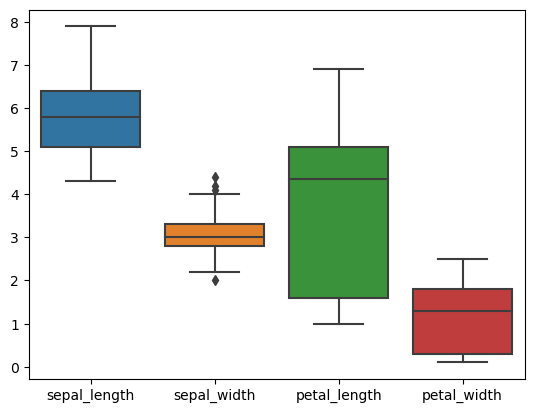

In [22]:
# 상자수염그림(박스플롯)
import seaborn as sns
sns.boxplot(data=iris)

In [23]:
iris['sepal_length'].rolling(5).mean() # 인접한 5개의 평균

0       NaN
1       NaN
2       NaN
3       NaN
4      4.86
       ... 
145    6.58
146    6.46
147    6.60
148    6.48
149    6.32
Name: sepal_length, Length: 150, dtype: float64

## 8.2 요약통계량
- describe()

In [24]:
# 1) 기본 요약 통계량
iris.describe() # 기본값 : 숫자열에서의 기본 통계량

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
iris['species'].describe()
iris.species.describe() # 문자열에서의 요약통계량 : 데이터갯수, 종류, 최빈데이터, 최빈데이터갯수

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [28]:
# 2) describe()의 include와 exclude 매개변수
df = pd.DataFrame({'a':[1,2,3]*2,
                  'b':[2.1,4]*3,
                  'c':['aaa','aaa','bbb','ccc','ddd','eee'],
                  'd':[True, False]*3})
df

,a,b,c,d
0,1,2.1,aaa,True
1,2,4.0,aaa,False
2,3,2.1,bbb,True
3,1,4.0,ccc,False
4,2,2.1,ddd,True
5,3,4.0,eee,False


In [29]:
df.describe() # 숫자열만 기본 요약 통계량 출력

,a,b
count,6.000000,6.000000
mean,2.000000,3.050000
std,0.894427,1.040673
min,1.000000,2.100000
25%,1.250000,2.100000
50%,2.000000,3.050000
75%,2.750000,4.000000
max,3.000000,4.000000


In [30]:
# include 매개변수를 통해서 요약통계량을 출력할 타입 지정
df.describe(include=['float64', 'bool', 'object'])

,b,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,3.050000,NaN,NaN
std,1.040673,NaN,NaN
min,2.100000,NaN,NaN
25%,2.100000,NaN,NaN
50%,3.050000,NaN,NaN
75%,4.000000,NaN,NaN


In [31]:
df.describe(include='all') # 모든 타입의 열 요약통계량 출력

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,5,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,2,3
mean,2.000000,3.050000,NaN,NaN
std,0.894427,1.040673,NaN,NaN
min,1.000000,2.100000,NaN,NaN
25%,1.250000,2.100000,NaN,NaN
50%,2.000000,3.050000,NaN,NaN
75%,2.750000,4.000000,NaN,NaN


In [32]:
# exclude 매개변수를 이용해서 기본통계량 출력에서 제외할 타입 지정
df.describe(exclude=['float64'])

,a,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,2.000000,NaN,NaN
std,0.894427,NaN,NaN
min,1.000000,NaN,NaN
25%,1.250000,NaN,NaN
50%,2.000000,NaN,NaN
75%,2.750000,NaN,NaN


In [35]:
df['c'].unique() # 특정 칼럼의 고유값들의 종류

array(['aaa', 'bbb', 'ccc', 'ddd', 'eee'], dtype=object)

In [36]:
# 고유값들의 빈도
df['c'].value_counts()

aaa    2
bbb    1
ccc    1
ddd    1
eee    1
Name: c, dtype: int64

## 8.3 공분산/상관계수

In [37]:
# 공분산 : (x1-x1평균)*(x2-x2평균)들의 합을 n-1로 나눈 값
X.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [38]:
# -1 <= 상관계수(공분/(x1의 표준편차*X2의 표준편차)) <=1
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


https://matplotlib.org/stable/tutorials/colors/colormaps.html

<Axes: >

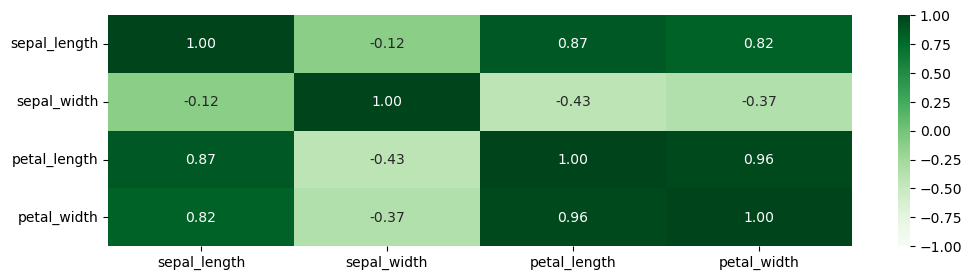

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 3))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Greens')